<a href="https://colab.research.google.com/github/Al-Tayeb96/Prediction-of-Product-Sales/blob/main/Chicago_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import holidays
import datetime as dt
from holidays import country_holidays

In [3]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import glob
folder = '/content/drive/MyDrive/ CodingDojo/DATA VISUALIZATION/week1/Data/'
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f,low_memory=False) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [7]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

df['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
chicago_full = df.sort_values('Datetime')
chicago_full

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022-12-31 12:50:00
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022-12-31 12:50:00
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,2022-12-31 12:52:00
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,2022-12-31 12:52:00


In [8]:
all_days = pd.date_range(df["Date"].min(), df["Date"].max())


In [9]:
us_holidays = country_holidays('US')
holiday_list = [us_holidays.get(day) for day in all_days]
chicago_full["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
chicago_full.head()



,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime,US Holiday
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00,New Year's Day
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00,New Year's Day
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00,New Year's Day
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00,New Year's Day
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00,New Year's Day


In [10]:
chicago_full['Is_Holiday'] = chicago_full['US Holiday'].notna()
chicago_full.head()


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime,US Holiday,Is_Holiday
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00,New Year's Day,True
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00,New Year's Day,True
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00,New Year's Day,True
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00,New Year's Day,True
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00,New Year's Day,True


In [11]:
#The original individual crime data with a datetime index. (Each row is 1 crime)
chicago_final_1=chicago_full.set_index('Datetime')
chicago_final_1

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday,Is_Holiday
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,New Year's Day,True
2001-01-01 01:00:00,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,New Year's Day,True
2001-01-01 01:00:00,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,New Year's Day,True
2001-01-01 01:00:00,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,New Year's Day,True
2001-01-01 01:00:00,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,New Year's Day,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,None,False
2022-12-31 12:50:00,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,None,False
2022-12-31 12:52:00,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,None,False


In [12]:
day_count=chicago_final_1.resample('D').sum()
day_count

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Is_Holiday
Datetime,,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024,1825
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277,0
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927,0
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683,0
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960,0
...,...,...,...,...,...,...,...,...,...
2022-12-27,7543189950,70,96,694723,6812.0,14192.0,21427.078656,-44887.568351,0
2022-12-28,7983384637,63,112,697152,6830.0,14030.0,22592.581721,-47339.899182,0
2022-12-29,8358666625,66,107,718511,7037.0,14292.0,23639.979313,-49528.016672,0


In [44]:
chicago_final_1.groupby("Description").size().index


Index(['$300 AND UNDER', '$500 AND UNDER', 'ABUSE / NEGLECT - CARE FACILITY',
       'ABUSE/NEGLECT: CARE FACILITY', 'ADULTRY',
       'AGG CRIM SEX ABUSE FAM MEMBER', 'AGG CRIMINAL SEXUAL ABUSE',
       'AGG PO HANDS ETC SERIOUS INJ', 'AGG PO HANDS NO/MIN INJURY',
       'AGG PRO EMP HANDS SERIOUS INJ',
       ...
       'VIOLATION OF STALKING NO CONTACT ORDER',
       'VIOLATION OF SUMMARY CLOSURE',
       'VIOLENT OFFENDER - ANNUAL REGISTRATION',
       'VIOLENT OFFENDER - DUTY TO REGISTER',
       'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS',
       'VIOLENT OFFENDER: ANNUAL REGISTRATION',
       'VIOLENT OFFENDER: DUTY TO REGISTER',
       'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS', 'WIREROOM/HORSES',
       'WIREROOM/SPORTS'],
      dtype='object', name='Description', length=547)

Topic 1) Comparing Police Districts

- Which district had the most crimes in 2022?
- Which had the least?

In [14]:
district_22=chicago_final_1.loc['2022':'2023',['District','Description']]
district_22


,District,Description
Datetime,,
2022-01-01 01:00:00,6.0,AUTOMOBILE
2022-01-01 01:00:00,14.0,AGGRAVATED - HANDGUN
2022-01-01 01:00:00,24.0,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...
2022-01-01 01:00:00,18.0,FROM BUILDING
2022-01-01 01:00:00,10.0,AGGRAVATED - OTHER DANGEROUS WEAPON
...,...,...
2022-12-31 12:50:00,10.0,SIMPLE
2022-12-31 12:50:00,7.0,AGGRAVATED - HANDGUN
2022-12-31 12:52:00,11.0,SIMPLE


In [15]:
district_22.groupby("District").size().sort_values(ascending=False).idxmax()


8.0

In [16]:
district_22.groupby("District").size().sort_values(ascending=False).idxmin()

31.0

Topic 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [25]:
total_crimes=chicago_final_1['Description'].resample('Y').size()
total_crimes.head()


Datetime
2001-12-31    485886
2002-12-31    486807
2003-12-31    475985
2004-12-31    469422
2005-12-31    453773
Freq: A-DEC, Name: Description, dtype: int64

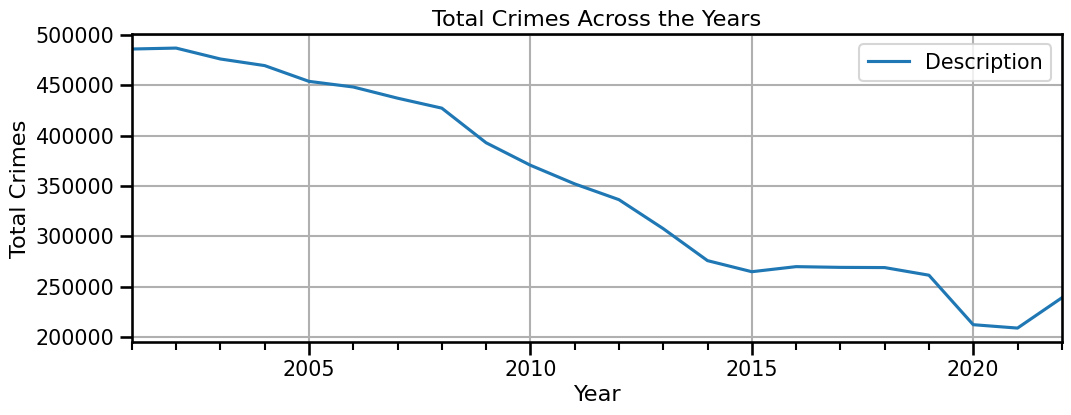

In [24]:

total_crimes.plot(title='Total Crimes Across the Years',xlabel='Year',ylabel='Total Crimes').grid()
plt.legend()

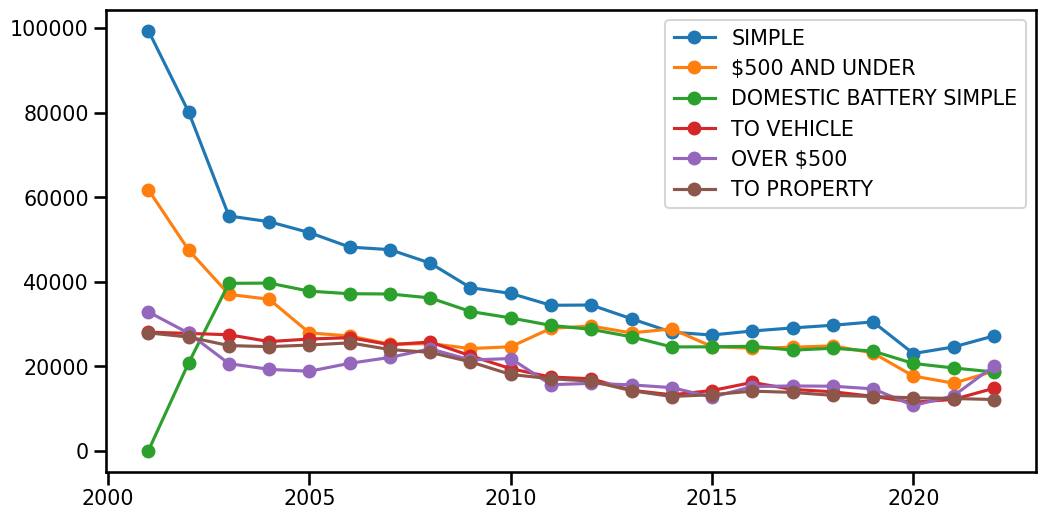

In [49]:
individual_crimes=chicago_final_1.groupby("Description").size().sort_values(ascending=False).index[0:6]
plt.figure(figsize=(12, 6))
for crime in individual_crimes:
    crime_counts = chicago_final_1[chicago_final_1['Description'] == crime].resample('Y').size()
    plt.plot(crime_counts.index.year, crime_counts.values, marker='o', linestyle='-', label=crime)
    plt.legend()

